## 1] Import the neccessary modules for data manipulation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Read the excel file and store our dataset into a dataframe called "df"
df=pd.read_excel(r"C:\Users\parix\OneDrive\Documents\GEMS_\Project\Retail.xlsx")

# To handle the warning messages generated by the program
import warnings
warnings.filterwarnings("ignore")

## 2] Displaying top 5 rows

In [3]:
df.head()

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,17147654,5.0,NaN,NaN,NaN,NaN,NaN,Tin,0.01,5.0,0.0
1,8415498,15.0,NaN,NaN,M,NaN,NaN,Gold,8000.00,5.0,1.0
2,12107603,NaN,NaN,NaN,M,Midlands,East,Tin,0.01,NaN,1.0
3,14400995,8.0,28.0,NaN,F,NaN,NaN,Tin,0.01,NaN,1.0
4,28724674,14.0,67.0,NaN,NaN,NaN,NaN,Tin,0.01,7.0,0.0


## 3] Find the shape 

In [4]:
df.shape

(22223, 11)

# Data Preprocessing

## 4] Dropping the unwanted column Customer ID from the dataset


In [5]:
df=df.drop(['ID'],axis=1)

df.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.0,NaN,NaN,NaN,NaN,NaN,Tin,0.01,5.0,0.0
1,15.0,NaN,NaN,M,NaN,NaN,Gold,8000.00,5.0,1.0
2,NaN,NaN,NaN,M,Midlands,East,Tin,0.01,NaN,1.0
3,8.0,28.0,NaN,F,NaN,NaN,Tin,0.01,NaN,1.0
4,14.0,67.0,NaN,NaN,NaN,NaN,Tin,0.01,7.0,0.0


## 5] Dealing with missing values

In [6]:
df.isna().sum()

DemAffl            1085
DemAge             1508
DemClusterGroup     674
DemGender          2512
DemReg              465
DemTVReg            465
LoyalClass            0
LoyalSpend            0
LoyalTime           281
TargetBuy             0
dtype: int64

In [7]:
df.skew()

DemAffl       0.891684
DemAge       -0.079830
LoyalSpend    8.037186
LoyalTime     2.282790
TargetBuy     1.168908
dtype: float64

In [8]:
df['DemAffl']=df['DemAffl'].fillna(df['DemAffl'].mode()[0])
df['DemAge']=df['DemAge'].fillna(df['DemAge'].mode()[0])
df['DemClusterGroup']=df['DemClusterGroup'].fillna(df['DemClusterGroup'].mode()[0])
df['DemGender']=df['DemGender'].fillna(df['DemGender'].mode()[0])
df['DemReg']=df['DemReg'].fillna(df['DemReg'].mode()[0])
df['DemTVReg']=df['DemTVReg'].fillna(df['DemTVReg'].mode()[0])
df['LoyalTime']=df['LoyalTime'].fillna(df['LoyalTime'].median())

In [9]:
df.isna().sum()

DemAffl            0
DemAge             0
DemClusterGroup    0
DemGender          0
DemReg             0
DemTVReg           0
LoyalClass         0
LoyalSpend         0
LoyalTime          0
TargetBuy          0
dtype: int64

## 6] Checking for outliers

<AxesSubplot:xlabel='DemAge'>

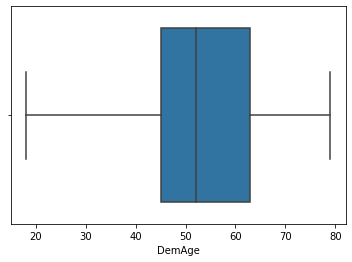

In [10]:
sns.boxplot(x=df['DemAge'])

<AxesSubplot:xlabel='DemAffl'>

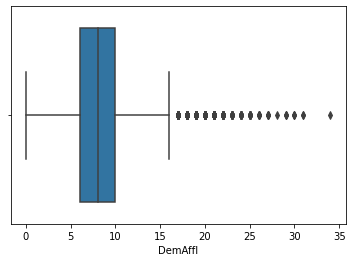

In [11]:
sns.boxplot(x=df['DemAffl'])

<AxesSubplot:xlabel='LoyalSpend'>

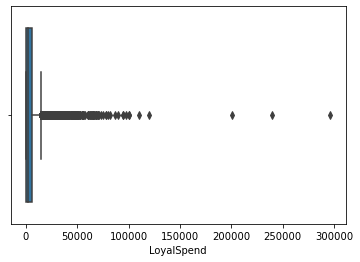

In [12]:
sns.boxplot(x=df['LoyalSpend'])

<AxesSubplot:xlabel='LoyalTime'>

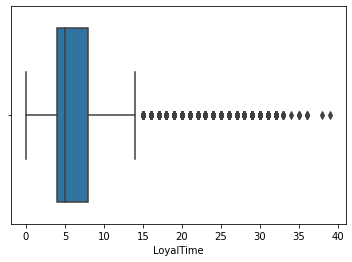

In [13]:
sns.boxplot(x=df['LoyalTime'])

### Exporting the cleaned dataset for EDA

In [14]:
df.to_excel("Clean_data_.xlsx")

# We have done EDA using Power BI to build interactive dashboard

## 7] Checking the datatype 

In [15]:
df.dtypes

DemAffl            float64
DemAge             float64
DemClusterGroup     object
DemGender           object
DemReg              object
DemTVReg            object
LoyalClass          object
LoyalSpend         float64
LoyalTime          float64
TargetBuy          float64
dtype: object

In [16]:
# Checking unique values of categorical columns

In [17]:
df['DemClusterGroup'].unique()

array(['C', 'B', 'E', 'D', 'F', 'A', 'U'], dtype=object)

In [18]:
df['DemGender'].unique()

array(['F', 'M', 'U'], dtype=object)

In [19]:
df['DemReg'].unique()

array(['South East', 'Midlands', 'North', 'South West', 'Scottish'],
      dtype=object)

In [20]:
df['DemTVReg'].unique()

array(['London', 'East', 'Ulster', 'S & S East', 'Yorkshire',
       'Wales & West', 'N West', 'Midlands', 'S West', 'N East', 'N Scot',
       'C Scotland', 'Border'], dtype=object)

In [21]:
df['LoyalClass'].unique()

array(['Tin', 'Gold', 'Silver', 'Platinum'], dtype=object)

## 8] Label encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

df['DemClusterGroup'] = number.fit_transform(df['DemClusterGroup'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

df['DemGender'] = number.fit_transform(df['DemGender'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

df['DemReg'] = number.fit_transform(df['DemReg'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

df['DemTVReg'] = number.fit_transform(df['DemTVReg'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

df['LoyalClass'] = number.fit_transform(df['LoyalClass'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'U': 6}
{'F': 0, 'M': 1, 'U': 2}
{'Midlands': 0, 'North': 1, 'Scottish': 2, 'South East': 3, 'South West': 4}
{'Border': 0, 'C Scotland': 1, 'East': 2, 'London': 3, 'Midlands': 4, 'N East': 5, 'N Scot': 6, 'N West': 7, 'S & S East': 8, 'S West': 9, 'Ulster': 10, 'Wales & West': 11, 'Yorkshire': 12}
{'Gold': 0, 'Platinum': 1, 'Silver': 2, 'Tin': 3}


In [23]:
df.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.0,51.0,2,0,3,3,3,0.01,5.0,0.0
1,15.0,51.0,2,1,3,3,0,8000.00,5.0,1.0
2,8.0,51.0,2,1,0,2,3,0.01,5.0,1.0
3,8.0,28.0,2,0,3,3,3,0.01,5.0,1.0
4,14.0,67.0,2,0,3,3,3,0.01,7.0,0.0


# 9] Model Building

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [45]:
# Separate the indepenent variables and the target variable 
y = df.iloc[:, 9].values
X = df.iloc[:, 0:9].values

In [46]:
# Split the data into train and test
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state =0)
len(X_train), len(X_test), len(y_train), len(y_test)

(17778, 4445, 17778, 4445)

### A] Logistic Regression

In [47]:
lr =  LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [48]:
print(confusion_matrix(y_test,y_pred))

[[3184  183]
 [ 684  394]]


In [49]:
print(accuracy_score(y_test, y_pred))

0.8049493813273341


### B] Random Forest

In [50]:
rf =  RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)

In [51]:
print(confusion_matrix(y_test,y_pred2))

[[3089  278]
 [ 655  423]]


In [52]:
print(accuracy_score(y_test, y_pred2))

0.7901012373453319


### C] Decision Tree

In [53]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred3 = dtree.predict(X_test)

In [54]:
print(confusion_matrix(y_test,y_pred3))

[[2694  673]
 [ 609  469]]


In [55]:
print(accuracy_score(y_test, y_pred3))

0.7115860517435321


In [56]:
final_data = pd.DataFrame({'Models':['Logistic Regression','Random Forest','Decision Tree'],
                          'Accuracy':[accuracy_score(y_test, y_pred)*100,
                                      accuracy_score(y_test, y_pred2)*100,
                                      accuracy_score(y_test, y_pred3)*100
                                     ]})
final_data

,Models,Accuracy
0,Logistic Regression,80.494938
1,Random Forest,79.010124
2,Decision Tree,71.158605


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

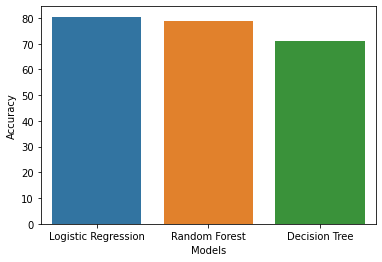

In [57]:
sns.barplot(final_data['Models'],final_data['Accuracy'])

### Logistic Regression holds the highest accuracy

In [58]:
predictions = lr.predict_proba(X_test)
predictions

array([[0.86235779, 0.13764221],
       [0.64235111, 0.35764889],
       [0.47779009, 0.52220991],
       ...,
       [0.88576659, 0.11423341],
       [0.90907235, 0.09092765],
       [0.88271344, 0.11728656]])

In [59]:
# writing model output file

df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])
df_x_test = pd.DataFrame(X_test)

dfx=pd.concat([df_x_test,df_test_dataset, df_prediction_prob], axis=1)

dfx.head()

,0,1,2,3,4,5,6,7,8,Actual Outcome,prob_0,prob_1
0,10.0,58.0,3.0,1.0,3.0,8.0,0.0,12632.66,4.0,0.0,0.862358,0.137642
1,10.0,51.0,2.0,0.0,3.0,8.0,0.0,6000.00,6.0,0.0,0.642351,0.357649
2,16.0,65.0,1.0,0.0,2.0,6.0,0.0,6053.35,7.0,0.0,0.477790,0.522210
3,5.0,60.0,3.0,0.0,3.0,3.0,2.0,5000.00,1.0,0.0,0.921347,0.078653
4,9.0,52.0,3.0,0.0,0.0,4.0,2.0,3500.00,6.0,0.0,0.707177,0.292823


### Segregation of customers based on buying probability score 

In [64]:
Bucket={'Low': (0, 0.29),
    'Medium': (0.3, 0.59),
    'High': (0.6, 1)}

In [65]:
def assign_bucket(polarity):
    for category, (lower, upper) in Bucket.items():
        if lower <= polarity <= upper:
            return category

In [66]:
dfx['Bucket'] =dfx['prob_1'].apply(assign_bucket)
dfx.head()

,0,1,2,3,4,5,6,7,8,Actual Outcome,prob_0,prob_1,Bucket
0,10.0,58.0,3.0,1.0,3.0,8.0,0.0,12632.66,4.0,0.0,0.862358,0.137642,Low
1,10.0,51.0,2.0,0.0,3.0,8.0,0.0,6000.00,6.0,0.0,0.642351,0.357649,Medium
2,16.0,65.0,1.0,0.0,2.0,6.0,0.0,6053.35,7.0,0.0,0.477790,0.522210,Medium
3,5.0,60.0,3.0,0.0,3.0,3.0,2.0,5000.00,1.0,0.0,0.921347,0.078653,Low
4,9.0,52.0,3.0,0.0,0.0,4.0,2.0,3500.00,6.0,0.0,0.707177,0.292823,None


In [67]:
dfx.groupby('Bucket').size().reset_index()

,Bucket,0
0,High,355
1,Low,2992
2,Medium,1015


## Based on the above predictions the client can target customers as below:


## a) For marketing we can consider both High & Medium class.
## b) For high sales & profit concentrate more on High class.